# FEATURE ENGINEERING

### Methodological Approach to Selecting the Optimal Number of PCA Components

Within a **cross-validation** framework, the correct methodology for determining the optimal number of components in **Principal Component Analysis (PCA)** follows a rigorous, multi-stage process. In each fold of the cross-validation, the procedure begins with **oversampling**, applied exclusively to the training set to mitigate any imbalances in class distribution and ensure a more equitable representation of the data. Next, a **Standard Scaler** is employed to normalize the features, ensuring that all variables share a comparable scale and preventing disproportionate influence from certain features. Finally, **PCA** is applied for dimensionality reduction, evaluating the number of components necessary to retain meaningful variance in each fold. Through this systematic procedure, **5 principal components** are identified as the optimal choice, effectively balancing dimensionality reduction with the preservation of essential information for predictive modeling.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
data = pd.read_csv('../data/raw/Pistachio_16_Features_Dataset.csv')

In [8]:
del data['id']

data.replace({'Kirmizi_Pistachio': 0, 'Siit_Pistachio' : 1 }, inplace=True)

X = data.iloc[:, 0:16]
columns = X.columns.to_list()

y = data[["Class"]]

In [9]:
variance_dict = {n: [] for n in range(1, X.shape[1] + 1)}

for i in range(1, 101):

    kf = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)
    
    fold_variances = {n: [] for n in range(1, X.shape[1] + 1)}

    for train_index, test_index in kf.split(X, y):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()

        # Oversampling using SMOTE
        smote = SMOTE(random_state=i)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Standardization
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_resampled)

        # PCA transformation
        pca = PCA(n_components=X_train_scaled.shape[1])
        X_train_pca = pca.fit_transform(X_train_scaled)

        for n, variance in enumerate(pca.explained_variance_ratio_):
            fold_variances[n + 1].append(variance)  

    for n_components in range(1, X.shape[1] + 1):
        variance_dict[n_components].append(np.mean(fold_variances[n_components]))


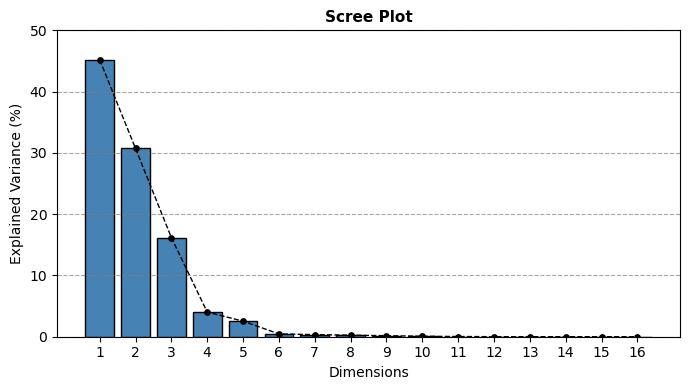

In [10]:
components = list(variance_dict.keys()) 
explained_variance_mean = [np.mean(variance_dict[n]) * 100 for n in components] 


plt.figure(figsize=(7,4))
plt.bar(components, explained_variance_mean, color='steelblue', edgecolor='black')
plt.scatter(components, explained_variance_mean, color='black', s=15)
plt.plot(components, explained_variance_mean, color='black', linestyle='--', linewidth=1)
plt.title('Scree Plot', fontsize=11, fontweight='bold')
plt.xlabel('Dimensions', fontsize=10)
plt.ylabel('Explained Variance (%)', fontsize=10)
plt.ylim(0, 50)
plt.xticks(range(1, len(components)+1))
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()